In [88]:
from pylab import *
import copy

Probemos buscar el mínimo de la función

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

Gradiente de f

$$ [ax,by]^T$$

In [165]:
def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad(r, a, b): # r es el vector de puntos
  return [a*r[0], b*r[1]]

aa = 1.0  # arbitrario elijo un a copado ==> a=1
bb = 0.1  # el problema pide b<1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])


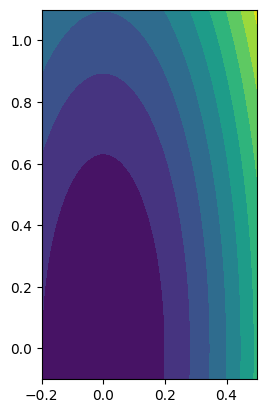

In [159]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - s \nabla f (\mathbf{x}_k) $$

In [160]:
Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)

xk[0] = bb     # este Xk[0] es arbitrario?
yk[0] = 1.0    # idem este Yk[0] es arbitrario? 


for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)



In [92]:
ncond=np.linalg.cond([[1,1],[3,2]])
print(ncond)

14.933034373659261


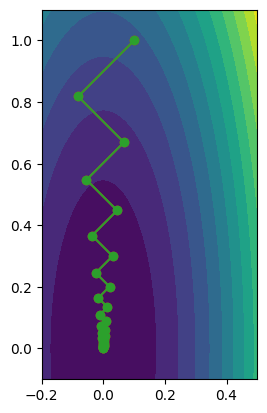

In [163]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

In [94]:
import numpy as np

# Parámetro de la función
b = 10

# Definimos la función
def f(x):
    return 0.5 * (x[0]**2 + b * x[1]**2)

# Gradiente de la función
def grad_f(x):
    return np.array([x[0], b * x[1]])

# Exact line search para encontrar el mejor alpha en la dirección -grad
def exact_line_search(x, d):
    # f(x - alpha * d) = 0.5 * ((x0 - alpha * d0)^2 + b*(x1 - alpha * d1)^2)
    # Derivada con respecto a alpha, igualamos a 0 y despejamos alpha:
    numerator = np.dot(grad_f(x), d)
    denominator = d[0]**2 + b * d[1]**2
    return numerator / denominator

# Descenso por gradiente con exact line search
def gradient_descent_exact_line_search(x0, tol=1e-6, max_iter=30):
    x = x0.copy()
    for i in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones")
            break
        d = -g
        alpha = exact_line_search(x, d)
        x = x + (-alpha) * g
    return x

# Punto inicial
x0 = np.array([5.0, 5.0])  # Puedes cambiarlo

# Ejecutar el algoritmo
xmin = gradient_descent_exact_line_search(x0)
print("Mínimo encontrado en:", xmin)
print("Valor mínimo de la función:", f(xmin))


Mínimo encontrado en: [8.73490542e+01 5.40328659e+09]
Valor mínimo de la función: 1.45977529962763e+20


In [95]:
numero_pasos=30

a=1
b=0.1
gradiente=[a,b]

def evaluar_gradiente(vector):
    return [vector[0]*gradiente[0],vector[1]*gradiente[1]]

x=[1,1]
alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa

# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

xx = np.linspace(-2*b, 0.5, num=100)    # como bb es pequeño entonces va desde -1 a 0.5
yy = np.linspace(-b, 1 + bb, num=200)   # va desde 0 a 1 

xk_gd = np.zeros(Nsteps+1)
yk_gd = np.zeros(Nsteps+1)
fk_gd = np.zeros(Nsteps+1)

xk_gd[0]=b
yk_gd[0]=1
for i in range(numero_pasos):
    xk_gd[i+1]=xk_gd[i]- alpha*evaluar_gradiente([xk_gd[i],xk_gd[i]])[0]
    yk_gd[i+1]=yk_gd[i]- alpha*evaluar_gradiente([yk_gd[i],yk_gd[i]])[1]



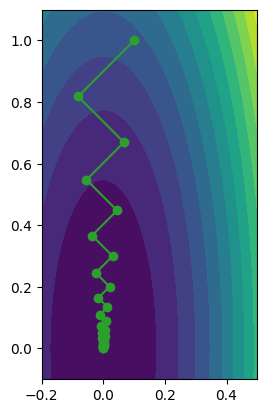

In [96]:
contourf(X, Y, test_fn([X, Y], a, b), levels=15)
#plot(xk, yk, color='C3', marker='o')
plot(xk_gd, yk_gd, color='C2', marker='o')
gca().set_aspect('equal')

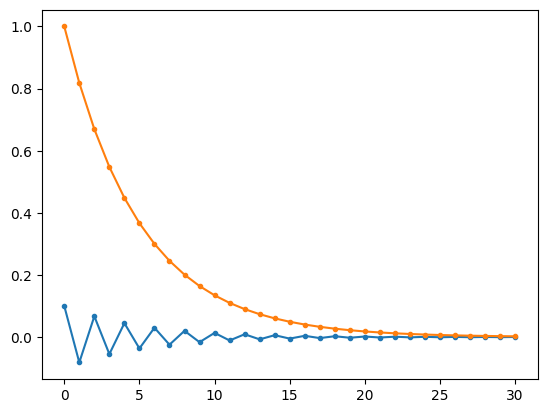

In [97]:
plot(xk_gd, marker='.')
plot(yk_gd, marker='.')

Ahora usamos su variante con momentum

  $$
    X_{k+1}=X_{k} - \alpha \nabla f(X_k) + \beta * (X_k-X_{k-1})
  $$

In [184]:
#necesito guardarme el X_{k-1}
numero_pasos=30
b=0.1
a=1
gradiente=[a,b]

def evaluar_gradiente(vector):
    return [vector[0]*gradiente[0],vector[1]*gradiente[1]]


##alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa
##beta=0.1
alpha = (2.0/(1+np.sqrt(bb)))**2
#alpha = 2 / (1 + b)#1/(2.0/(1+np.sqrt(b)))**2
beta = ((1-np.sqrt(b))/(1+np.sqrt(b)))**2
# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

xk_mom = np.zeros(numero_pasos+1)
yk_mom = np.zeros(numero_pasos+1)
wk=np.zeros(numero_pasos+1)
zk=np.zeros(numero_pasos+1)
xk_mom[0]=b
yk_mom[0]=1.0

wk[0]=evaluar_gradiente([xk_mom[0],yk_mom[0]])[0] 
zk[0]=evaluar_gradiente([xk_mom[0],yk_mom[0]])[1] 


for i in range(numero_pasos):
    xk_mom[i+1]=xk_mom[i]- alpha*wk[i]
    yk_mom[i+1]=yk_mom[i]- alpha*zk[i]

    wk[i+1]=evaluar_gradiente([xk_mom[i+1],yk_mom[i+1]])[0] +beta*wk[i]
    zk[i+1]=evaluar_gradiente([xk_mom[i+1],yk_mom[i+1]])[1] +beta*zk[i]
    


#plot(xk, yk, color='C2', marker='o')

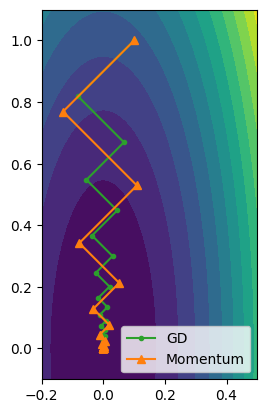

In [185]:
contourf(X, Y, test_fn([X, Y], a, b), levels=15)
plot(xk, yk, color='C2', marker='.', label='GD') #verde
plot(xk_mom, yk_mom, color='C1', marker='^', label='Momentum')
legend()
gca().set_aspect('equal')

Cuando b es muy cercano a 1 entonces es muy cercano a (a=1) y converge rapidamente

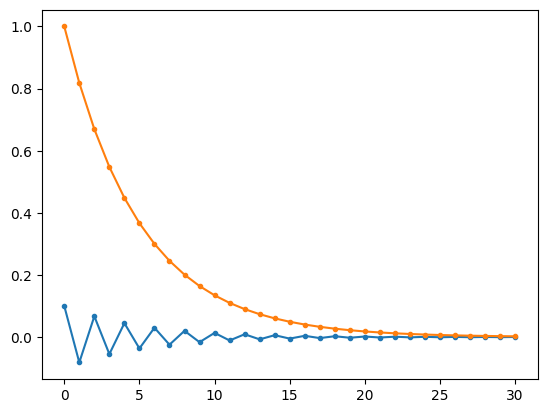

In [100]:
plot(xk, marker='.')
plot(yk, marker='.')

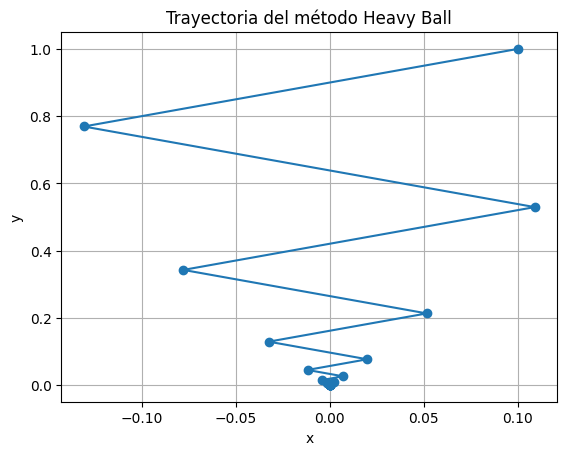

In [101]:
import numpy as np
import matplotlib.pyplot as plt

numero_pasos = 30
b = 0.1
a = 1
gradiente = [a, b]

def evaluar_gradiente(vector):
    return [vector[0] * gradiente[0], vector[1] * gradiente[1]]

alpha = (2.0 / (1 + np.sqrt(b)))**2
beta = ((1 - np.sqrt(b)) / (1 + np.sqrt(b)))**2

xk = np.zeros(numero_pasos + 1)
yk = np.zeros(numero_pasos + 1)

xk[0] = b
yk[0] = 1

xk[1] = xk[0] - alpha * evaluar_gradiente([xk[0], yk[0]])[0]
yk[1] = yk[0] - alpha * evaluar_gradiente([xk[0], yk[0]])[1]

for i in range(1, numero_pasos):
    xk[i+1] = xk[i] - alpha * evaluar_gradiente([xk[i], yk[i]])[0] + beta * (xk[i] - xk[i-1])
    yk[i+1] = yk[i] - alpha * evaluar_gradiente([xk[i], yk[i]])[1] + beta * (yk[i] - yk[i-1])

plt.plot(xk, yk, marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria del método Heavy Ball")
plt.grid(True)
plt.show()


## Una version usando newton

La version de newton es igual solo que se usa para descender una derivada segunda (el hessiano)


\begin{bmatrix}
\frac{d^2}{dxdx}(xy) & \frac{d^2}{dxdy}(xy) \\
\frac{d^2}{dydx}(xy) & \frac{d^2}{dydy}(xy)
\end{bmatrix}

Evaluado en el punto $$X_0$$


Entonces newton clasico quedaria: 

$$
    X_{k=1}=X_k-H(X_k)^{-1} * \nabla f(X_k)
$$



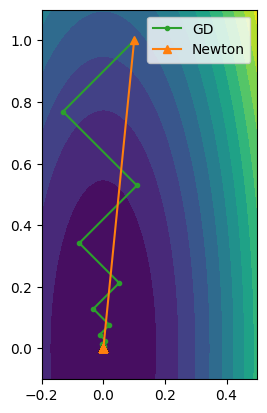

In [ ]:
Nsteps = 300
alpha = 2.0/(1+bb)  # Elegido con el criterio de exact line search

b = 0.1
a = 1
xk_newton = np.zeros(Nsteps+1)
yk_newton = np.zeros(Nsteps+1)


xk_newton[0] = bb    # este Xk[0] es arbitrario?
yk_newton[0] = a   # idem este Yk[0] es arbitrario? 

H_1=[[1/a,0],
    [0,1/b]]

for ii in range(Nsteps):

  grad_newton=np.transpose(grad((xk_newton[ii], yk_newton[ii]), a, b))
  P=H_1@grad_newton
  # Resolver H * p = grad  =>  p = H^{-1} grad
  #p = np.linalg.solve(H, grad)  # Más estable que invertir
  P=np.transpose(P)

  xk_newton[ii+1] = xk_newton[ii] - P[0]
  yk_newton[ii+1] = yk_newton[ii] - P[1]



contourf(X, Y, test_fn([X, Y], a, b), levels=15)
plot(xk, yk, color='C2', marker='.', label='GD') #verde
plot(xk_newton, yk_newton, color='C1', marker='^', label='Newton')
legend()
gca().set_aspect('equal')

## Backtraking

Aca una de las diferencias principales es que tenemos que evaluar a la funcion en el punto para saber si mejoro o no, a diferencia de los casos con GD o momentum que simplemente evaluamos el gradiente.
Aca el learning rate no es constante como en los otros, sino que varia. Y lo que se busca es un alfa suficientemente bueno.

c es la condicion de Armijo
$$
    c=\frac{1}{3}
    b=\frac{1}{2}
$$
  si 
$$
f(X_{k+1}) <= f(X_{k})- \alpha * c * \| \nabla f \|^2
$$
entonces sigo

si no
$$
 \alpha = \beta * \alpha
$$


In [231]:
def backtraking(x,y,alpha,beta,c,a,b):
    """
        Cambio el alpha
    """
    grad_x,grad_y=evaluar_gradiente([x,y])

    while True: ## itero hasta que finalmente baje
        # Calculo el yK+1 como siempre y luego evaluo en la funcion de arriba
        xk_bk_1=x-alpha*grad_x
        yk_bk_1=y- alpha*grad_y
        fx_new=test_fn([xk_bk_1,yk_bk_1],a,b)

        if fx_new<test_fn([x, y], a, b)-alpha*c*(grad_x**2+grad_y**2) : # cambio el alfa si la medicion no mejoro
            break

        alpha*=beta
        
    return alpha




#necesito guardarme el X_{k-1}
numero_pasos=100
b=0.1
a=1
gradiente=[a,b]

def evaluar_gradiente(vector):
    return [vector[0]*gradiente[0],vector[1]*gradiente[1]]


##alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa
##beta=0.1

alpha = 2 / (1 + b)#1/2
beta = 1/3
c=1e-4
# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

x_bk = np.zeros(numero_pasos+1)
y_bk = np.zeros(numero_pasos+1)
fk_bk=np.zeros(numero_pasos+1)
## arranco el en punto (b,1 )
x_bk[0]=b
y_bk[0]=1
fk_bk[0]=test_fn([a,b],a,b)
x_bk[1]=x_bk[0]- alpha*evaluar_gradiente([x_bk[0],y_bk[0]])[0] 
y_bk[1]=y_bk[0]- alpha*evaluar_gradiente([x_bk[0],y_bk[0]])[1]

for i in range(1,numero_pasos):
    alpha=backtraking(x_bk[i],y_bk[i],alpha,beta,c,a,b)
    x_bk[i+1]=x_bk[i]- alpha*evaluar_gradiente([x_bk[i],y_bk[i]])[0]
    y_bk[i+1]=y_bk[i]- alpha*evaluar_gradiente([x_bk[i],y_bk[i]])[1] 
    fk_bk[i+1]=test_fn([x_bk[i+1],y_bk[i+1]],a,b)   
       





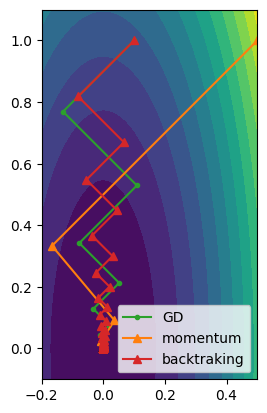

In [86]:
contourf(X, Y, test_fn([X, Y], a, b), levels=15)
plot(xk, yk, color='C2', marker='.', label='GD') #verde
plot(xk_mom, yk_mom, color='C1', marker='^', label='momentum')
plot(x_bk, y_bk, color='C3', marker='^', label='backtraking')
legend()
gca().set_aspect('equal')

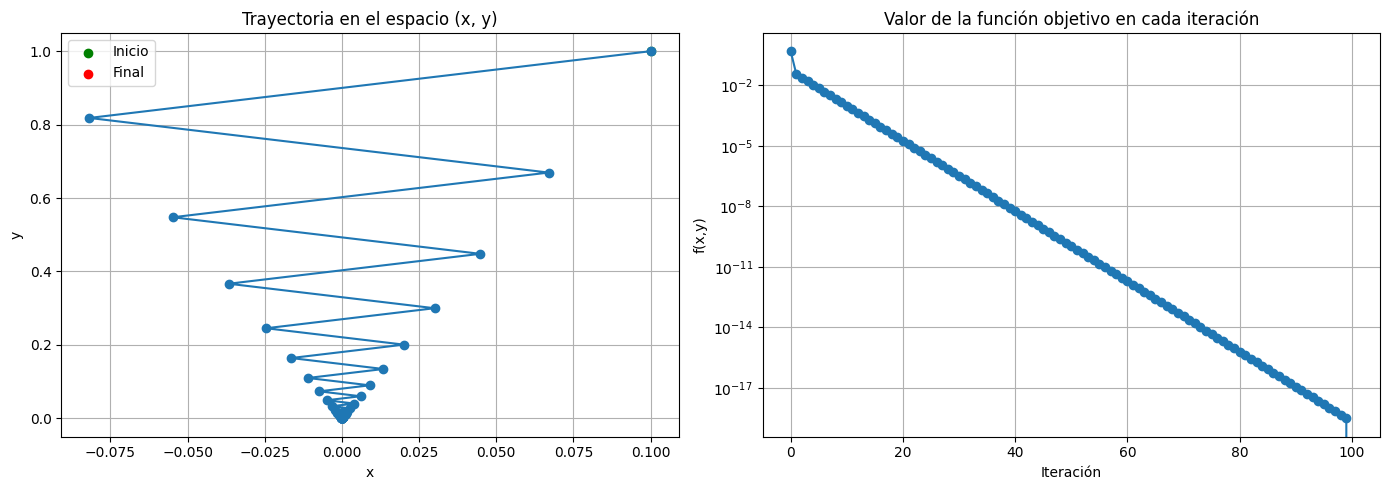

In [87]:
plt.figure(figsize=(14,5))

# Plot trayectoria (x,y)
plt.subplot(1,2,1)
plt.plot(x_bk, y_bk, marker='o')
plt.title("Trayectoria en el espacio (x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.scatter(x_bk[0], y_bk[0], color='green', label='Inicio')
plt.scatter(x_bk[-1], x_bk[-1], color='red', label='Final')
plt.legend()

# Plot función objetivo vs iteraciones
plt.subplot(1,2,2)
plt.plot(range(numero_pasos+1), fk_bk, marker='o')
plt.title("Valor de la función objetivo en cada iteración")
plt.xlabel("Iteración")
plt.ylabel("f(x,y)")
plt.yscale("log")  # Escala logarítmica para ver mejor la bajada
plt.grid(True)

plt.tight_layout()
plt.show()

# Cambiamos la función
$$

f(x_1,x_2) = 100(x_2− x_1^2)^2+ (1− x_1)^2

$$

1
1
0.012345679012345678
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.0004572473708276176
0.00045

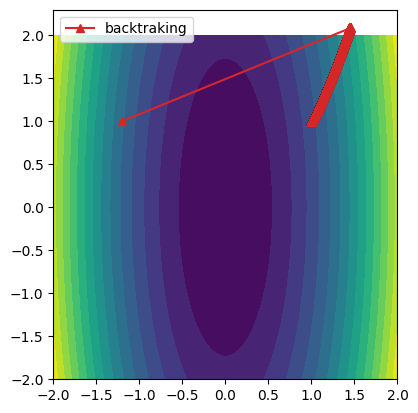

In [235]:
def f2(x,y):
    return 100*((y-x**2)**2)+(1-x)**2

def grad_2(x,y):
    a= -400 *(y-x**2) *x-2*(1-x)
    b=200 *(y-x**2)
    return [a,b]

def hessian_2(x,y):
    a=-400*(y-x**2)+800*x**2+2
    b=-400*x
    c=-400*x
    d=200
    h=[[a,b],
       [c,d]]
    return h

def backtraking(x,y,alpha,beta,c):
    """
        Cambio el alpha
    """
    grad_x,grad_y=grad_2(x,y)
    grad_cuadrado=grad_x**2+grad_y**2
    while True: ## itero hasta que finalmente baje
        # Calculo el yK+1 como siempre y luego evaluo en la funcion de arriba
        xk_bk_1=x-alpha*grad_x
        yk_bk_1=y- alpha*grad_y
        fx_new=f2(xk_bk_1,yk_bk_1)

        fk=f2(x, y)-alpha*c*grad_cuadrado
        if fx_new< fk: # cambio el alfa si la medicion no mejoro
            break

        alpha*=beta
        
    return alpha




#necesito guardarme el X_{k-1}
numero_pasos=100000
x_0=-1.2
y_0=1


##alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa
##beta=0.1

alpha = 1#2 / (1 + b)#1/2
beta = 1/3
c=1e-4
# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

x_bk = np.zeros(numero_pasos+1)
y_bk = np.zeros(numero_pasos+1)
fk_bk=np.zeros(numero_pasos+1)
## arranco el en punto (b,1 )
x_bk[0]=x_0
y_bk[0]=y_0
fk_bk[0]=f2(x_0,y_0)
print(alpha)
x_bk[1]=x_bk[0]- alpha*grad_2(x_bk[0],y_bk[0])[0] 
y_bk[1]=y_bk[0]- alpha*grad_2(x_bk[0],y_bk[0])[1]

for i in range(numero_pasos):
    print(alpha)
    alpha=backtraking(x_bk[i],y_bk[i],alpha,beta,c)
    x_bk[i+1]=x_bk[i]- alpha*grad_2(x_bk[i],y_bk[i])[0]
    y_bk[i+1]=y_bk[i]- alpha*grad_2(x_bk[i],y_bk[i])[1] 
    fk_bk[i+1]=f2(x_bk[i+1],y_bk[i+1])   
       

contourf(X, Y, test_fn([X, Y], a, b), levels=15)
#plot(xk, yk, color='C2', marker='.', label='GD') #verde
#plot(xk_mom, yk_mom, color='C1', marker='^', label='momentum')
plot(x_bk, y_bk, color='C3', marker='^', label='backtraking')
legend()
gca().set_aspect('equal')


# SGD

# Optimizacion con adam


Resultado final: x = 0.00294, y = 0.00294


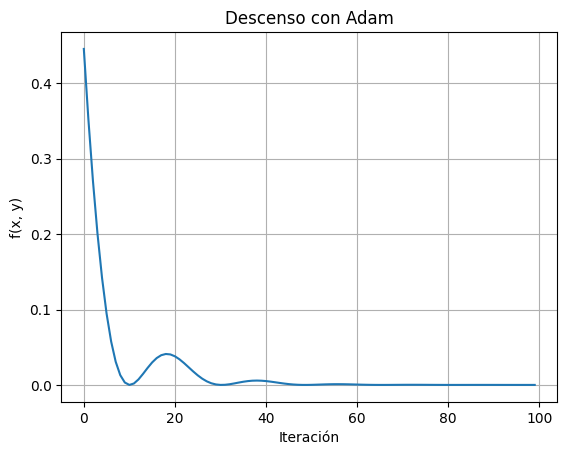

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Función y gradiente
def f(x, y, b):
    return 0.5 * (x**2 + b * y**2)

def grad(x, y, b):
    return np.array([x, b * y])

# Parámetros
b = 0.1
alpha = 0.1  # learning rate
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
num_steps = 100

# Inicialización
xk = np.array([1.0, 1.0])  # punto inicial
m = np.zeros(2)
v = np.zeros(2)
f_vals = []

# Adam
for t in range(1, num_steps + 1):
    g = grad(xk[0], xk[1], b)
    
    # Actualizar momentos
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * (g ** 2)
    
    # Bias correction
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    
    # Actualización de parámetros
    xk = xk - alpha * m_hat / (np.sqrt(v_hat) + eps)

    f_vals.append(f(xk[0], xk[1], b))

print(f"Resultado final: x = {xk[0]:.5f}, y = {xk[1]:.5f}")
plt.plot(f_vals)
plt.xlabel("Iteración")
plt.ylabel("f(x, y)")
plt.title("Descenso con Adam")
plt.grid(True)
plt.show()


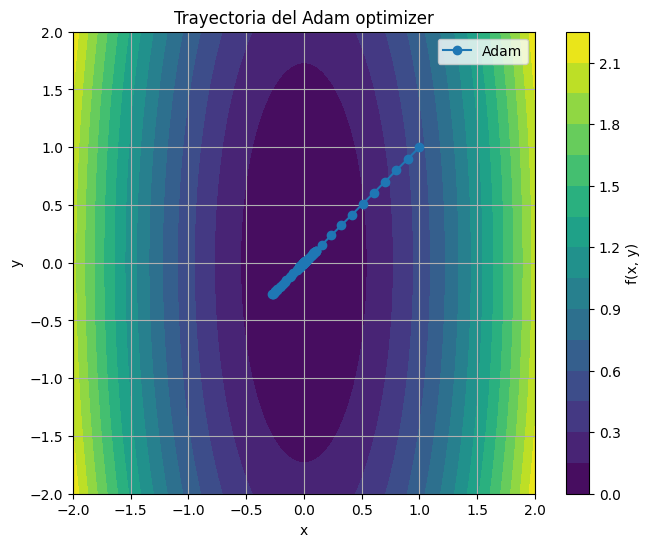

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función y gradiente
def test_fn(XY, a, b):
    x, y = XY
    return 0.5 * (x**2 + b * y**2)

def grad(XY, a, b):
    x, y = XY
    return np.array([x, b * y])

# Parámetros de la función
a = 1
b = 0.1
alpha = 0.1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
num_steps = 100

# Inicialización
xk = np.zeros(num_steps + 1)
yk = np.zeros(num_steps + 1)
f_vals = np.zeros(num_steps + 1)

xk[0], yk[0] = 1.0, 1.0
m = np.zeros(2)
v = np.zeros(2)

# ADAM
for t in range(1, num_steps + 1):
    g = grad([xk[t-1], yk[t-1]], a, b)
    
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * (g ** 2)
    
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    
    step = alpha * m_hat / (np.sqrt(v_hat) + eps)
    new_point = np.array([xk[t-1], yk[t-1]]) - step
    
    xk[t], yk[t] = new_point
    f_vals[t] = test_fn(new_point, a, b)

# Crear el grid para el contorno
xx = np.linspace(-2, 2, 300)
yy = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(xx, yy)
Z = test_fn([X, Y], a, b)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.plot(xk, yk, color='C0', marker='o', label='Adam')
plt.legend()
plt.gca().set_aspect('equal')
plt.title("Trayectoria del Adam optimizer")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="f(x, y)")
plt.grid(True)
plt.show()
